In [11]:
import dm_event
import time

import numpy as np
import matplotlib.pyplot as plt

# Detected signal Model (Signal efficiency and ionization energy)

Let's study DM particles with $\sigma= 10^{-41}$ cm$^{2}$ and $m_{\chi}=5$ GeV.
We are going to suppose we have a Silicon detector of 1kg and we have collected data during 365. We want the energies that this particles are going to let on the detector. In this case we will measure the ionization energy produced by the nuclear recoils of the Silicon with DM.

In [2]:
dm = dm_event.dm_event(14, 14, 5, 3e-42, 1, 365, True)

We are going to suppose the detector has a flat background of 0.1 dru and a threshold efficiency of 4eV in background events.

In [3]:
start_time = time.time()
dm_events = dm.simul_ev(0.1,4e-3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 73.09696865081787 seconds ---


For this DM particles we can see the number of expected signal events and background detected.

In [4]:
dm.verbose()

Number of Signal events:  65
Number of Background events:  266


And the energy spectrum.

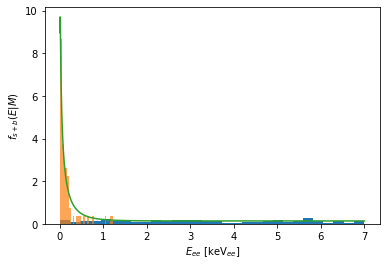

In [9]:
plt.hist(dm.bkg_ev, bins = 30, density=True)
plt.hist(dm.signal_ev, bins = 30, density=True, alpha = 0.7)
#dm.plot_var("fb")
#dm.plot_var("fs")
dm.plot_var("fsb")

Now we want to see how well we can distinguish the signal from the background. To do this we need to perform the likelihood of the model against the background only hypothesis likelihood.

In [6]:
dm.likelihood(deltaLL = True, sigmaEe_b = 4e-3)

array([4560.22954793])

In [13]:
print("Likelihood Cross section: ", -41.48739772)
print("Original: ", np.log10(3e-42))

Likelihood Cross section:  -41.48739772
Original:  -41.52287874528034


In [8]:
dm.verbose()

Number of Signal events:  65
Number of Background events:  266
Likelihood parameters:  [-41.48739772 261.58652811]
Background Only-Likelihood Events :  [330.99615756]
dLL:  [72.0294717]


# Theoretical Model (No signal efficiency and nuclear recoils energy)

In [14]:
dm_t = dm_event.dm_event(14, 14, 5, 3e-42, 1, 365, False)

In [15]:
start_time = time.time()
dm_events = dm_t.simul_ev(0.1,4e-3)
print("--- %s seconds ---" % (time.time() - start_time))

--- 2.0122716426849365 seconds ---


Number of Signal events:  74
Number of Background events:  236
Likelihood parameters:  [-41.55900126 231.4825177 ]
Background Only-Likelihood Events :  [310.00051103]
dLL:  [-207.66258062]


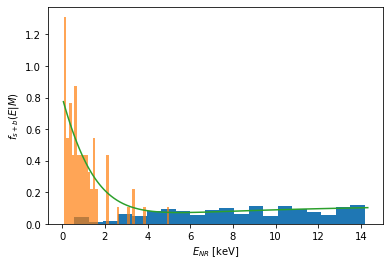

In [22]:
dm_t.verbose()
plt.hist(dm_t.bkg_ev, bins = 20, density=True)
plt.hist(dm_t.signal_ev, bins = 40, density=True, alpha = 0.7)

dm_t.plot_var("fsb")

In [17]:
dm_t.likelihood(deltaLL = True, sigmaEe_b = 4e-3)

array([45012.96061586])

In [18]:
dm_t.verbose()

Number of Signal events:  74
Number of Background events:  236
Likelihood parameters:  [-41.55900126 231.4825177 ]
Background Only-Likelihood Events :  [310.00051103]
dLL:  [-207.66258062]


In [23]:
print("Likelihood Cross section: ", -41.55900126)
print("Original: ", np.log10(3e-42))

Likelihood Cross section:  -41.55900126
Original:  -41.52287874528034


## Testing different Mass values

In [27]:
dm5 = dm_event.dm_event(14, 14, 5, 6e-43, 1, 365, True)
dm5.verbose()
dm_events = dm5.simul_ev(0.1,4e-3)
dm5.likelihood(deltaLL = True, sigmaEe_b = 4e-3)

Number of Signal events:  12
b:  [-793.84355061]
sb:  -799.1709033747668
DeltaLL:  [5.32735276]
4.5


array([0.68451259])

In [32]:
dm5.verbose()

Number of Signal events:  12
Number of Background events:  279
Likelihood parameters:  [-42.19626807 277.42855613]
Background Only-Likelihood Events :  [291.00059008]
dLL:  [5.32735276]


In [47]:
dm10 = dm_event.dm_event(14, 14, 10, 6e-43, 1, 365, True)
dm10.verbose()
dm_events = dm10.simul_ev(0.1,4e-3)
dm10.likelihood(deltaLL = True, sigmaEe_b = 4e-3)

Number of Signal events:  16
b:  [-786.39446984]
sb:  -788.0602585608121
DeltaLL:  [1.66578872]
4.5


array([8.03275358])